# PROJECT FOR DATA SCIENCE 1 COURSE
## SIGNAL PROCESSING GROUP
### TU DARMSTADT.
#### By Ayinde Bashir 

###  Introduction
Forest fire has affected many regions in the world. Europe, America, and Australia have been badly affected by the risk of this disaster. Forest fires, particularly those that usually occur close to urban areas are identified as one of the significant threats to public health security in the 21st century (WHO, 2007). The disaster contributes to loss of life, property, climate change, and environmental degradation. However, due to the effect, there is a need for different stakeholders to identify the risk and magnitude of the impacts of these forest fires and also contribute to disaster risk reduction using the various structural and non-structural approaches.

This study aim to predict burnt area using Linear regression and support vector machine regression model, and evaluates the performance of the two model.
this report will also address the following research questions.
1. Which of the variables significantly influence the extent of the forest fire?
2. Does the relationship between the periods (months and days) and extent of forest fire (area) have any significant effect?

In [251]:
## Importing the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.svm import SVR
from scipy import stats

import os

# PREPROCESSING 

In [181]:
# loading of dataframe
forestdf = pd.read_csv('C:\\Users\\user\\Desktop\\Data Science\\Forest Fire\\forestfires.csv')

forestdf.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Where DMC (Duff Moisture Code), FFMC (Fine fuel Mositure Code) and DC (Drought Code) for the fire with the largest impacted area

In [12]:
DMC_Max = forestdf[forestdf['area'] == max(forestdf['area'])]['DMC']
FFMC_Max = forestdf[forestdf['area'] == max(forestdf['area'])]['FFMC']
DC_Max = forestdf[forestdf['area'] == max(forestdf['area'])]['DC']

FFMC_Max

238    92.5
Name: FFMC, dtype: float64

DMC (Duff Moisture Code), FFMC (Fine fuel Mositure Code) and DC (Drought Code) for the fire with the largest impacted area

In [17]:
# Using Slicing operation to identify the highest burnt area
The month of september in row 238 experienced the highest forest fire burnt area.
print(forestdf[234:240])

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area
234  4  5   sep  sat  92.5  121.1  674.4   8.6  17.7  25   3.1   0.0   154.88
235  8  6   aug  sun  91.4  142.4  601.4  10.6  19.6  41   5.8   0.0   196.48
236  2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46   1.8   0.0   200.94
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40   2.2   0.0   212.88
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27   4.0   0.0  1090.84
239  7  5   apr  sun  81.9    3.0    7.9   3.5  13.4  75   1.8   0.0     0.00


The month of september in row 238 experienced the highest forest fire burnt area.

In [19]:
# Creating sub dataframes for ploting categorical data

d1 = 'area'
df1 = forestdf.drop(columns=d1)
cat_col = df1.select_dtypes(include = "object").columns.tolist()

cat_col

['month', 'day']

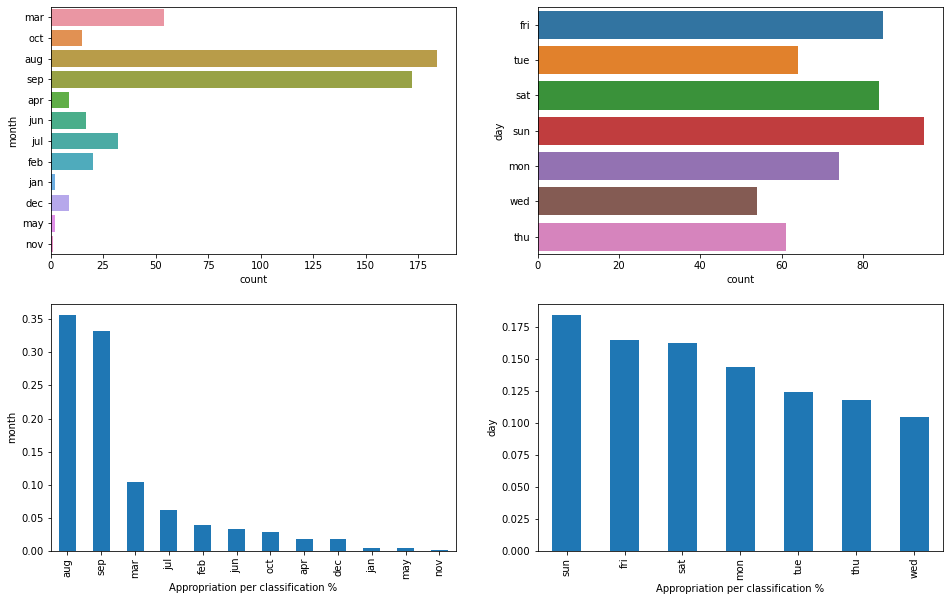

In [21]:
## Plotting the categorical columns

plt.figure(figsize=(16,10))
for i, col in enumerate(cat_col,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1, y=col)
    plt.subplot(2,2,i+2)
    forestdf[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel("Appropriation per classification %")
plt.show()

From the plot, It can be seen that more forest fire was experienced in the month of August and September and Sundays have the most frequent fire occurence. Dataset for the monthly forest fire event showed a positive skewed distribution.

# Statistical Inference

##### Corellation Analysis

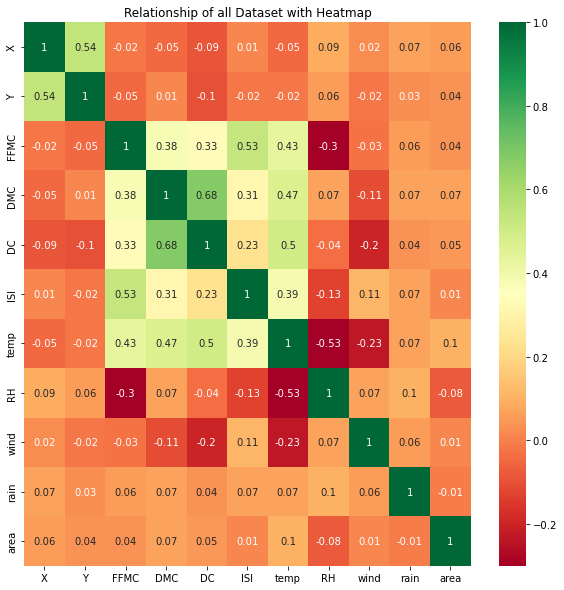

In [307]:
## Checking the correllation between all the dataset and also in relationship with the burnt area using Heatmap
## Note: The correllation analysis was performed based on Pearson's r coefficient.

cor1 =  forestdf.corr().round(2)

plt.figure(figsize=(10,10))
sns.heatmap(cor1, annot=True, cmap="RdYlGn", robust=True)
plt.title('Relationship of all Dataset with Heatmap')
plt.show()

From the correlation analysis, all the variables are not significantly correlated to the area extent of the forest fire. Among all the variables, temperature exhibited slight positve correlation with a value of 0.1.

##### ONE-WAY ANOVA

Null Hypothesis: The burnt area extent **do not differ** among all the forest fire periods (months and days)

Alternative Hypothesis: The burnt area extent **differ** among all the forest fire periods (months and days)

<function matplotlib.pyplot.show(close=None, block=None)>

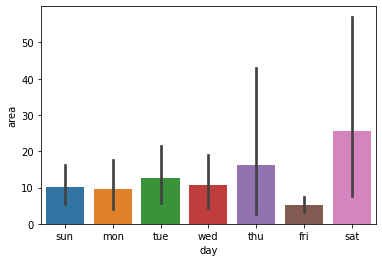

In [70]:
df_day = forestdf[["area","day"]]
df_day.head()
chart_day = sns.barplot(x='day',y='area', data = df_day, order=['sun','mon','tue','wed','thu','fri','sat']);
df_day.groupby('day').area.mean()
plt.show

For the chart, it was observed that saturday experienced more burnt forested area on average than the remaining days

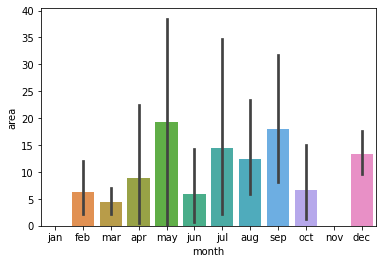

In [104]:
df_month = forestdf[["area","month"]]
chart_month = sns.barplot(x='month',y='area', data = df_month, order=['jan','feb','mar','apr','may','jun','jul',
                                                                      'aug','sep','oct','nov','dec']);
df_month.groupby('month').area.mean()
plt.show()

For the chart, it was observed that the month of May and september experienced more burnt forested area on average than the remaning months. on the other hand, the month of january and november experience little to no burnt forested area.

In [101]:
#grouping of the data according to their category.
grps_month = pd.unique(df_month.month.values)
grps_day = pd.unique(df_day.day.values)
d_data = {grp:df_month['area'][df_month.month == grp] for grp in grps_month}
d_data2 = {grp:df_day['area'][df_day.day == grp] for grp in grps_day}

In [109]:
## One way Anova for Monthly occurence
from scipy.stats import f_oneway
f_oneway(d_data['jan'],d_data['feb'],d_data['mar'],d_data['apr'],d_data['may'],d_data['jun'],
         d_data['jul'],d_data['aug'],d_data['sep'],d_data['oct'],d_data['nov'],d_data['dec'])

F_onewayResult(statistic=0.2528525500660293, pvalue=0.9931307408492104)

For the Monthly occurence, the test statistics is lower than the critical value, Hence we accept our Null hypothesis and deduce that there is no significant difference between the mean of the months where the forest areas were burnt

In [110]:
## One way Anova for daily occurence
from scipy.stats import f_oneway
f_oneway(d_data2['sun'],d_data2['mon'],d_data2['tue'],d_data2['wed'],d_data2['thu'],d_data2['fri'],d_data2['sat'])

F_onewayResult(statistic=0.8593465295893405, pvalue=0.5246901872339959)

For the daily occurence, the test statistics is higher than the critical value, Hence we reject our Null hypothesis and deduce that there is probably a significant difference between some of the mean of the daily events and therefore we should investigate further the day that differs among the others.

# Regression and Classification section

In [286]:
# Creating a new column to the original dataframe to categorise the fire
forestdf['fire_scale'] = forestdf['area'].apply(lambda x: 'no_fire' if (x==0) else
                                                          'small_fire' if ((x>0)&(x<2)) else
                                                          'large_fire'
                                              )
print(forestdf.shape)
forestdf.head(2)

(517, 14)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire_scale
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,no_fire
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,no_fire


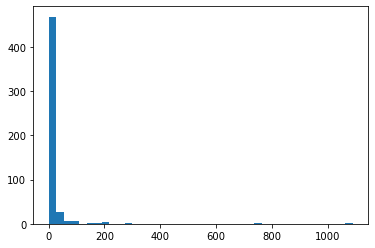

In [183]:
# Checking for normal distribution of the data
plt.hist(forestdf.area, bins = 40)
plt.show()

This data shows that the burnt area are not normally distributed as the dataset is skewed to the right (positively skewed data)

Convert the categorical columns (months and days) to 1's and 0's


In [287]:
d = forestdf.copy()

In [185]:
x = d.drop(['area', 'fire_scale'], axis = 1)
y = d['area']

In [186]:
x = pd.get_dummies(x, ['month','day'])
x.head(1)
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64

In [187]:
# seperate the data column that would be used for scaling
x_col_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
x_col_scaling

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

#### Splitting dataset

In [189]:
### Log transformation of data was done since the data does not follow the a normal distribution
x_train, x_test, y_train, y_test = train_test_split(x, np.log(y+1), shuffle = True)
print(x_train.shape,x_test.shape)

(387, 29) (130, 29)


Since the data does not follow a normal distribution, the data was transformed using a logarithm transformation.

####Splitting for scaling 

In [190]:
x_train_orig = x_train.loc[:, x_col_scaling]
x_train_cat = x_train.drop(x_col_scaling, axis = 1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:,x_train_cat.columns]

In [237]:
###Standard Scaler
scl= preprocessing.StandardScaler()
scl.fit(x_train_orig)

x_train_orig = scl.transform(x_train_orig)
x_test_orig = scl.transform(x_test_orig)

##Combining the scaled dataset
x_train = np.concatenate([x_train_orig, np.array(x_train_cat)], axis = 1)
x_test = np.concatenate([x_test_orig, np.array(x_test_cat)], axis = 1)

print(x_train.shape, x_test.shape)

(387, 29) (130, 29)


For the training and testing, the data was splitted into 75% for training and the remaining 25% for testing.

## Regression Model ##

## Logistic Linear regression

mse:  2.037
mae:  1.189
r2:  -0.122


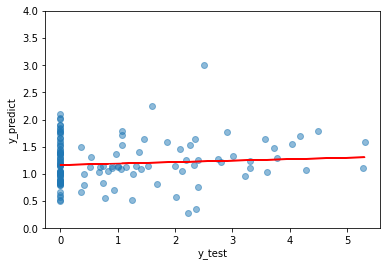

In [235]:
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)

#Predict
y_predict = lr.predict(x_test)

#metric score
mse = metrics.mean_squared_error(y_test, y_predict)
print('mse: ', np.round(mse, 3))

mae = metrics.mean_absolute_error(y_test, y_predict)
print('mae: ', np.round(mae, 3))

r2 = metrics.r2_score(y_test, y_predict)
print('r2: ', np.round(r2, 3))

## Plotting
plt.scatter(y_test, y_predict, alpha=0.5)
plt.ylim((0,4))
plt.xlabel('y_test')
plt.ylabel('y_predict')

m, b = np.polyfit(y_test, y_predict, 1)
plt.plot(y_test, m*y_test+b, color='red')

After performing linear regression with the transformed dataset, the rsquare value is very far away from 1 and, the actual value and the predicted values are extremely poorly fitted. Hence we need to try another regression model to see if it will perform better than the first one.

### Support Vector Machine Regression

mse:  2.051
mae:  1.029
r2:  -0.129


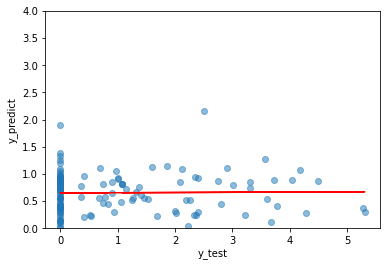

In [255]:
svr = SVR(C=1, kernel='rbf', max_iter=5e4, gamma='auto', cache_size=1000)
svr.fit(x_train, y_train)

# Predict
y_predict = svr.predict(x_test)

#metric score
mse = metrics.mean_squared_error(y_test, y_predict)
print('mse: ', np.round(mse, 3))

mae = metrics.mean_absolute_error(y_test, y_predict)
print('mae: ', np.round(mae, 3))

r2 = metrics.r2_score(y_test, y_predict)
print('r2: ', np.round(r2, 3))

## Plotting
plt.scatter(y_test, y_predict, alpha=0.5)
plt.ylim((0,4))
plt.xlabel('y_test')
plt.ylabel('y_predict')

m, b = np.polyfit(y_test, y_predict, 1)
plt.plot(y_test, m*y_test+b, color='red')

Support vector machine regression model poorly performed as compared with that of the linear regression

## CONCLUSION: 
The burnt areas for the forest were predicted using linear regression and support vector machine regression models. The two models predicted badly for the dataset. This can be due to the inadequate data to predict the area of forest fire burn. Around 350 training dataset was used.
It is recommended that more datasets should be added to the existing data to obtain a representative prediction result. Moreso, upsampling of datasets (introducing artifacts) can also be suggested for periods poorly represented in the dataset to see how the model will be responsive.

## REFERENCE
##### Forest Fire data source
Source: https://www.kaggle.com/competitions/forestfiresarea/data?select=sample_submission.csv
